### Задание 1.

Решите задачу распознавания лиц с помощью SVM с ядром. Попробуйте различные ядра: 'poly', 'rbf', 'sigmoid'.

Подберите гиперпараметры по кросс-валидации.

SVM с каким ядром дал лучший результат?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import roc_auc_score, classification_report
import seaborn as sns

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


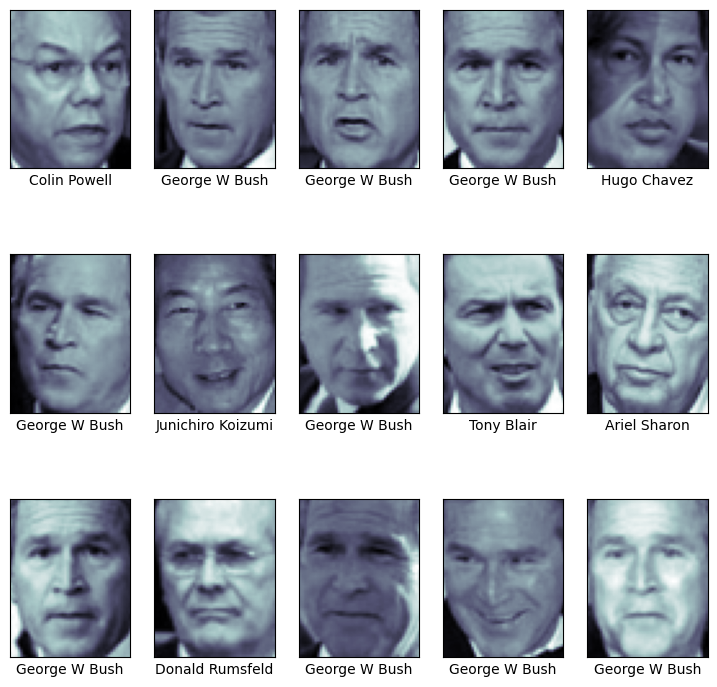

In [ ]:
fig, ax = plt.subplots(3, 5, figsize=(9,9))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [ ]:
faces.images.shape

(1348, 62, 47)

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, svd_solver='randomized', whiten=True, random_state=42)

In [ ]:
# kernel='poly'

In [ ]:
svc = SVC(kernel='poly')

model = make_pipeline(pca, svc)

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)

print(grid.best_params_)

CPU times: user 15.9 s, sys: 11.3 s, total: 27.2 s
Wall time: 17.7 s
{'svc__C': 50}


In [ ]:
model = grid.best_estimator_

yfit = model.predict(Xtest)

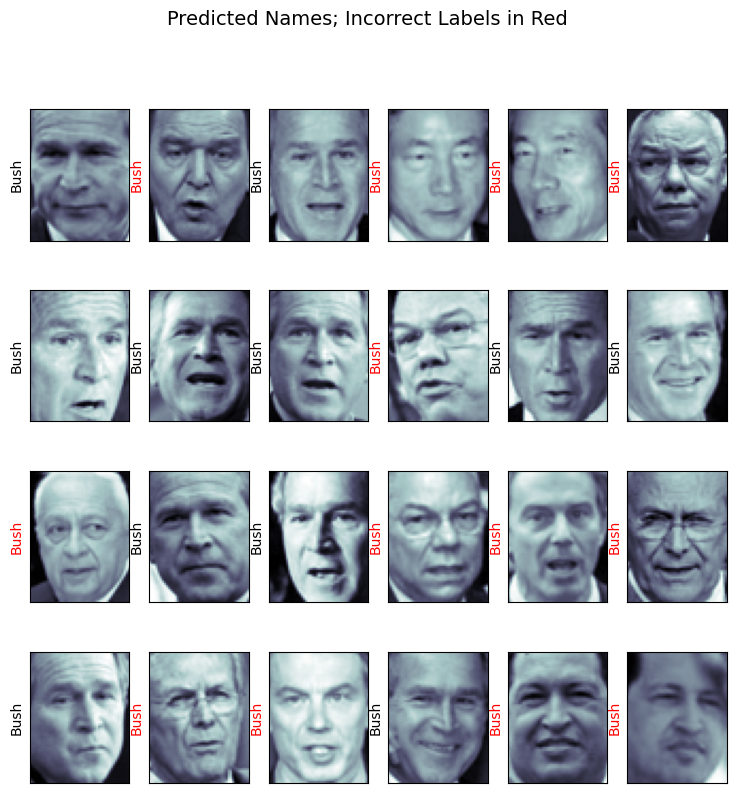

In [ ]:
fig, ax = plt.subplots(4, 6, figsize=(9,9))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.13      0.24        15
     Colin Powell       1.00      0.16      0.28        68
  Donald Rumsfeld       0.00      0.00      0.00        31
    George W Bush       0.40      0.99      0.57       126
Gerhard Schroeder       0.50      0.04      0.08        23
      Hugo Chavez       1.00      0.05      0.10        20
Junichiro Koizumi       1.00      0.33      0.50        12
       Tony Blair       1.00      0.07      0.13        42

         accuracy                           0.44       337
        macro avg       0.74      0.22      0.24       337
     weighted avg       0.65      0.44      0.33       337



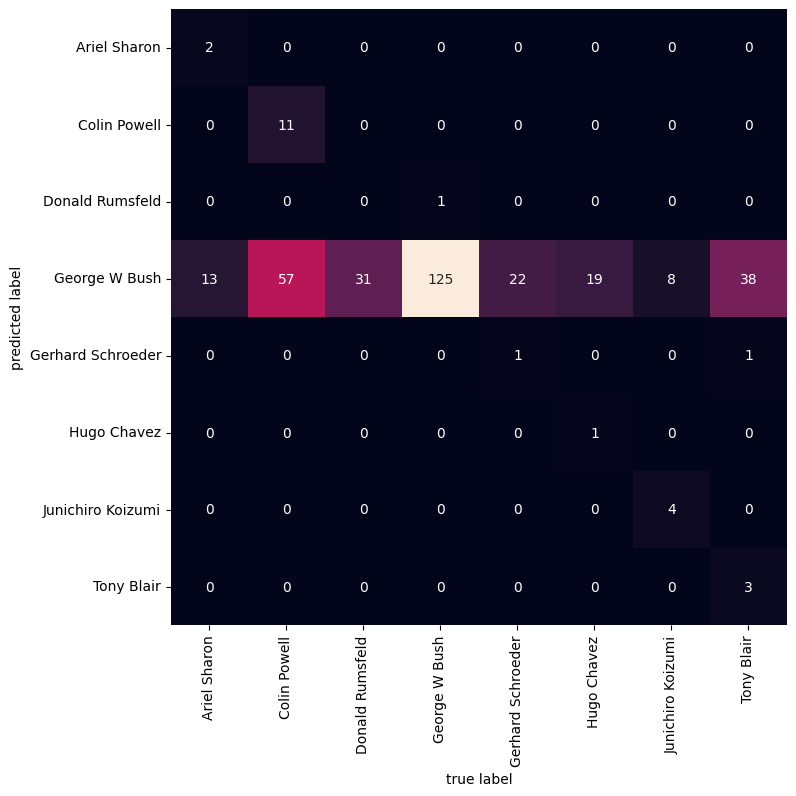

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8,8))
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(yfit,ytest)

0.4362017804154303

In [ ]:
# kernel='rbf'

In [ ]:
svc = SVC(kernel='rbf')

model = make_pipeline(pca, svc)

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)

print(grid.best_params_)

CPU times: user 17.5 s, sys: 9.74 s, total: 27.3 s
Wall time: 27.6 s
{'svc__C': 5}


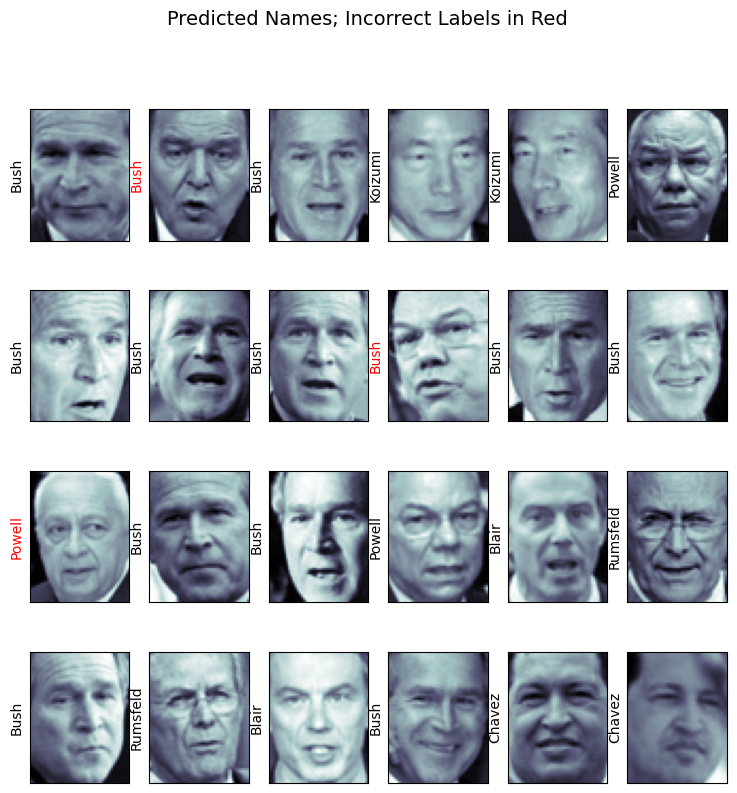

In [ ]:
model = grid.best_estimator_

yfit = model.predict(Xtest)

fig, ax = plt.subplots(4, 6, figsize=(9,9))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [ ]:
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.67      0.80        15
     Colin Powell       0.88      0.90      0.89        68
  Donald Rumsfeld       0.95      0.58      0.72        31
    George W Bush       0.74      0.97      0.84       126
Gerhard Schroeder       0.93      0.61      0.74        23
      Hugo Chavez       1.00      0.65      0.79        20
Junichiro Koizumi       1.00      0.83      0.91        12
       Tony Blair       0.92      0.79      0.85        42

         accuracy                           0.83       337
        macro avg       0.93      0.75      0.82       337
     weighted avg       0.86      0.83      0.83       337



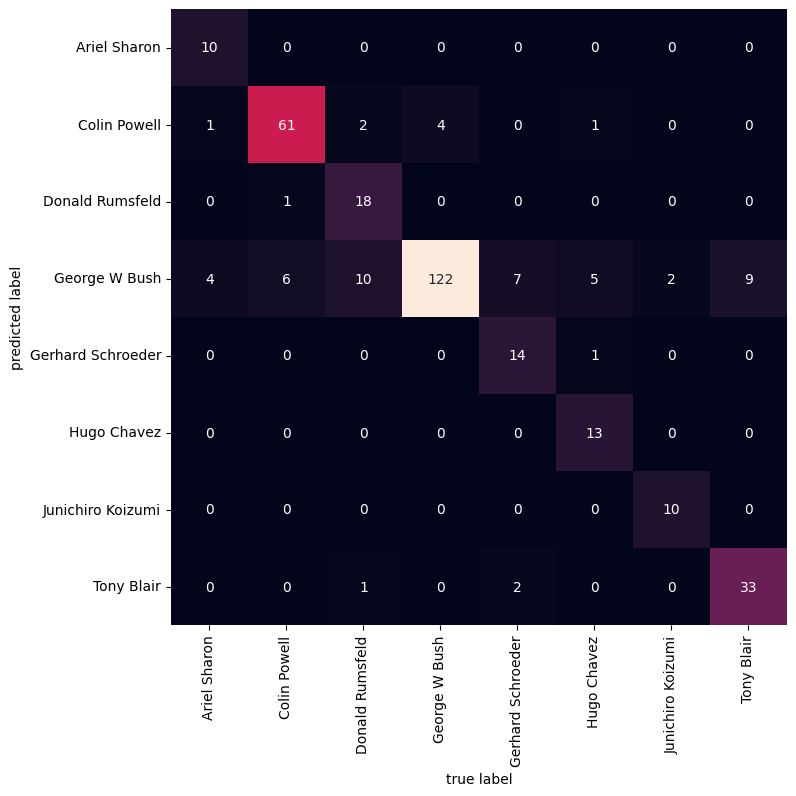

In [ ]:
plt.figure(figsize=(8,8))
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
accuracy_score(yfit,ytest)

0.8338278931750742

In [ ]:
# kernel='sigmoid'

In [ ]:
svc = SVC(kernel='sigmoid')

model = make_pipeline(pca, svc)

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)

print(grid.best_params_)

CPU times: user 14.6 s, sys: 9.49 s, total: 24.1 s
Wall time: 21.6 s
{'svc__C': 1}


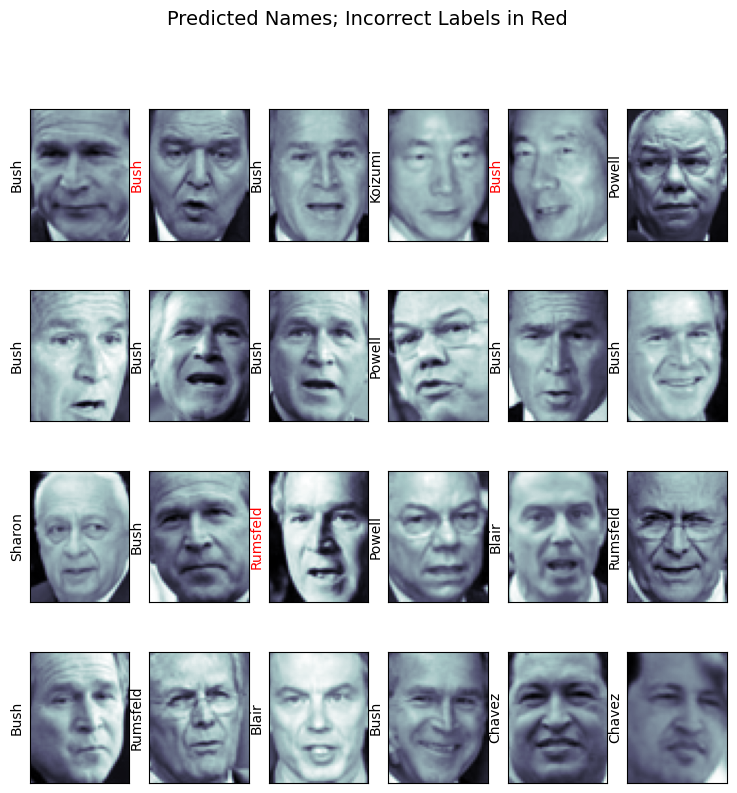

In [ ]:
model = grid.best_estimator_

yfit = model.predict(Xtest)

fig, ax = plt.subplots(4, 6, figsize=(9,9))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [ ]:
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.73      0.73      0.73        15
     Colin Powell       0.84      0.85      0.85        68
  Donald Rumsfeld       0.79      0.71      0.75        31
    George W Bush       0.82      0.89      0.85       126
Gerhard Schroeder       0.70      0.70      0.70        23
      Hugo Chavez       1.00      0.65      0.79        20
Junichiro Koizumi       1.00      0.92      0.96        12
       Tony Blair       0.80      0.79      0.80        42

         accuracy                           0.82       337
        macro avg       0.83      0.78      0.80       337
     weighted avg       0.82      0.82      0.82       337



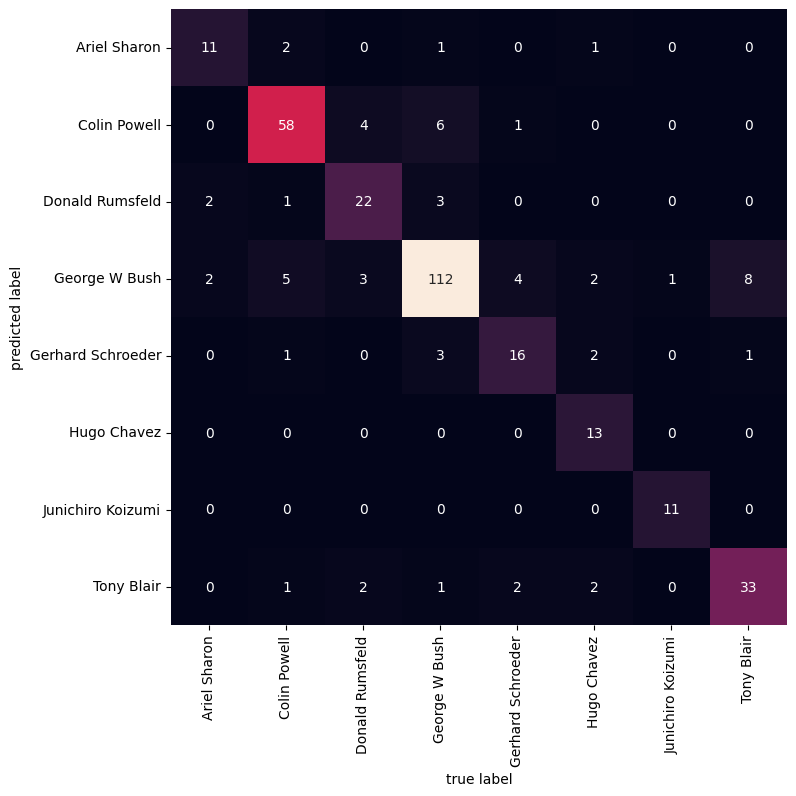

In [ ]:
plt.figure(figsize=(8,8))
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
accuracy_score(yfit,ytest)

0.8189910979228486

### Задание 2.

Решите задачу распознавания лиц с помощью логистической регрессии (она также поддерживает опцию class_weight='balanced'):

1) Объявите модель, состоящую из pipeline(pca,logistic regression)

2) Подберите по сетке параметр C логистической регрессии (с помощью GridSearch)

3) Обучите модель на тренировочных данных и выведите наилучшие параметры модели

Какое качество показала эта модель?

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import roc_auc_score, classification_report
import seaborn as sns

In [113]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [114]:
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [115]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, svd_solver='randomized', whiten=True, random_state=42)
lr = LogisticRegression()

In [116]:
model = make_pipeline(pca, lr)

In [ ]:
#или так: model = Pipeline([
    #('lr', LogisticRegression()),
    #('pca', PCA(n_components=150, svd_solver='randomized', whiten=True, random_state=42))
#])

In [ ]:
# hyperparams = np.logspace(-4, 4, 20) или np.linspace(-4, 4, 3) - от, до, количество точек

In [117]:
from sklearn.model_selection import GridSearchCV
param_grid = {'logisticregression__C': np.logspace(-4, 4, 10)}
grid = GridSearchCV(model, param_grid, scoring='roc_auc_ovr')

%time grid.fit(Xtrain, ytrain)

print(grid.best_params_)

CPU times: user 28.6 s, sys: 23.5 s, total: 52.1 s
Wall time: 30.8 s
{'logisticregression__C': 0.046415888336127774}


              precision    recall  f1-score   support

           0       1.00      0.97      0.98        62
           1       0.96      0.96      0.96       168
           2       1.00      0.96      0.98        90
           3       0.96      0.99      0.98       404
           4       0.99      0.98      0.98        86
           5       1.00      1.00      1.00        51
           6       1.00      0.98      0.99        48
           7       1.00      0.94      0.97       102

    accuracy                           0.98      1011
   macro avg       0.99      0.97      0.98      1011
weighted avg       0.98      0.98      0.98      1011
               precision    recall  f1-score   support

           0       0.71      0.80      0.75        15
           1       0.87      0.87      0.87        68
           2       0.78      0.68      0.72        31
           3       0.88      0.87      0.87       126
           4       0.61      0.74      0.67        23
           5       0.92 

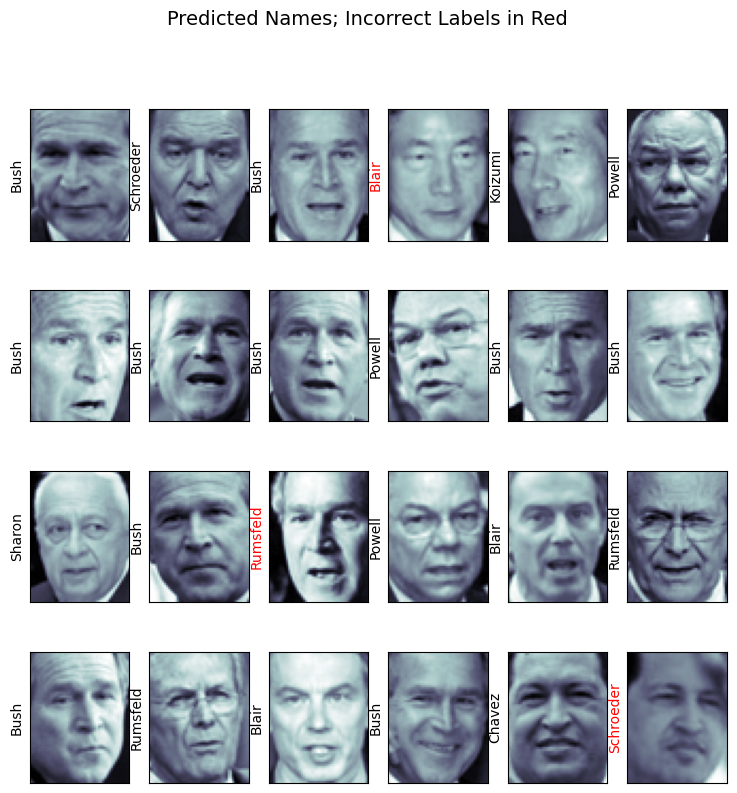

In [119]:
model = grid.best_estimator_

y_pred_train = model.predict(Xtrain)
y_pred_test = model.predict(Xtest)

print(classification_report(ytrain, y_pred_train), classification_report(ytest, y_pred_test))

#print(roc_auc_score(ytrain, y_pred_train, multi_class='ovr'), roc_auc_score(ytest, y_pred_test, multi_class='ovr'))

fig, ax = plt.subplots(4, 6, figsize=(9,9))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[y_pred_test[i]].split()[-1],
                   color='black' if y_pred_test[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

### Задание 3.

Разбалловка:

- 5 баллов: обучили один алгоритм и погридсерчили
- 10 баллов: попробовали обучить два и более алгоритмов, погридсерчили

Поработайте с датасетом winequalityN (целевая переменная - quality). Поэкспериментируйте с алгоритмами классификации, попробуйте подобрать гиперпараметры для них.

In [ ]:
data = pd.read_csv('winequalityN.csv')
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
wine_type = data['type'].unique()
print(wine_type)

['white' 'red']


In [ ]:
data['type'] = data['type'].apply(lambda x: 0 if x == 'white' else 1)

# или можно по-другому, но выдает true/false: data['type'] = data['type'] == 'white'

In [ ]:
data.sample(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3454,0,5.8,0.54,0.00,1.4,0.033,40.0,107.0,0.98918,3.26,0.35,12.4,5
1735,0,8.0,0.32,0.36,4.6,0.042,56.0,178.0,0.99280,3.29,0.47,12.0,6
5750,1,8.0,0.42,0.32,2.5,0.080,26.0,122.0,0.99801,3.22,1.07,9.7,5
3514,0,7.7,0.38,0.23,10.8,0.030,28.0,95.0,0.99164,2.93,0.41,13.6,6
1646,0,6.4,0.22,0.49,7.5,0.054,42.0,151.0,0.99480,3.27,0.52,10.1,6
4307,0,6.5,0.22,0.27,1.6,0.039,36.0,116.0,0.99178,3.38,0.57,11.0,7
2006,0,8.4,0.20,0.38,11.8,0.055,51.0,170.0,1.00040,3.34,0.82,8.9,6
359,0,6.9,0.24,0.34,4.7,0.040,43.0,161.0,0.99350,3.20,0.59,10.6,6
5405,1,11.2,0.67,0.55,2.3,0.084,6.0,13.0,1.00000,3.17,0.71,9.5,6
2344,0,7.0,0.23,0.26,7.2,0.041,21.0,90.0,0.99509,3.22,0.55,9.5,6


In [ ]:
data = data.fillna(data.mean())

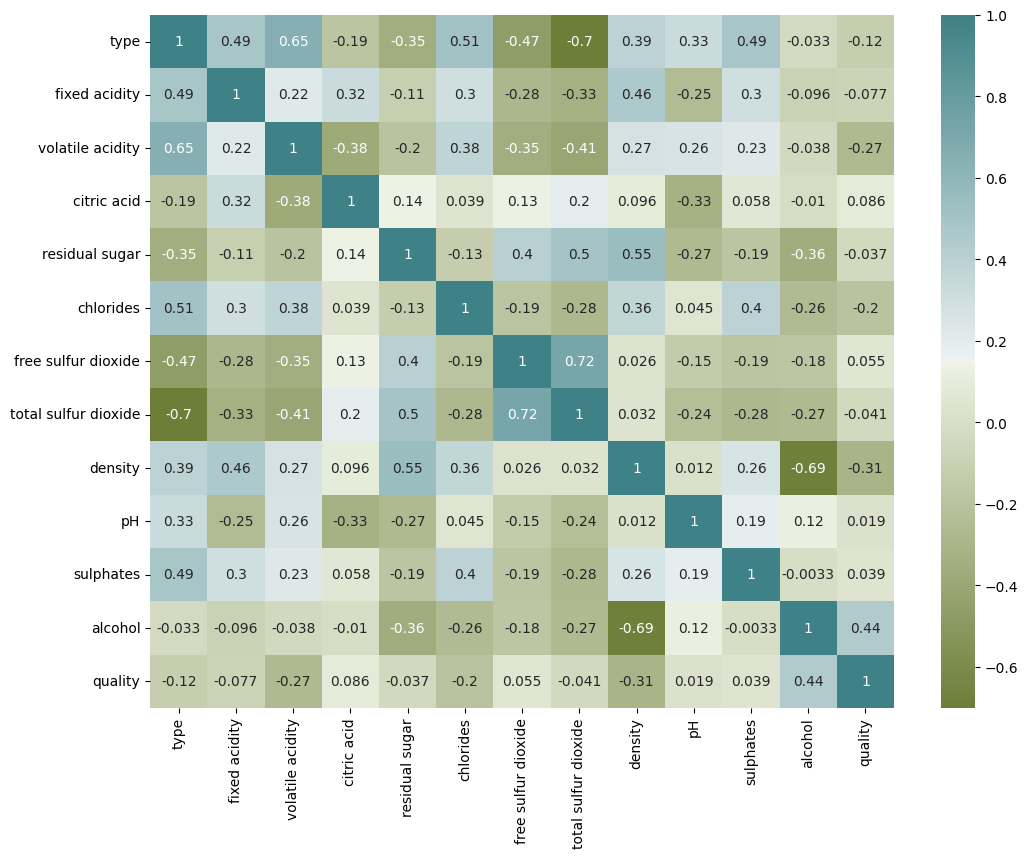

In [ ]:
plt.figure(figsize=(12,9))
dataplot = sns.heatmap(data.corr(), cmap=sns.diverging_palette(100,200,as_cmap=True), annot=True)

plt.show()

In [ ]:
# столбцы 'free sulfur dioxide' и 'total sulfur dioxide' очень похожи, один удаляю

data.drop(['free sulfur dioxide'], axis=1, inplace=True)

In [ ]:
# дальше будет выдавать предупреждение на кросс-валидации, что объектов '9' слишком мало. Поэтому присоединяю 9 к 8

data['quality'] = data['quality'].apply(lambda x: 8 if x == 9 else x)

In [ ]:
data['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     198
3      30
Name: quality, dtype: int64

In [ ]:
X = data.drop('quality', axis=1)
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [97]:
def plotting(grid, params):
    scores_mean = grid.cv_results_['mean_test_score']
    scores_sd = grid.cv_results_['std_test_score']

    plt.plot(params, scores_mean, label='scores_mean')
    plt.fill_between(params, (scores_mean-scores_sd), (scores_mean+scores_sd), color='g', alpha=.1, label='std')
    plt.xlabel('params')
    plt.ylabel('cv_score')
    plt.legend(loc='best')
    plt.show()

In [98]:
def model_train(model, param_grid, hyperparams):
    grid = GridSearchCV(model, param_grid, cv=3)  # также можно было для решения проблемы с недостаточным количеством девяток уменьшить кол-во фолдов: cv=3

    grid.fit(X_train, y_train)
    plotting(grid, hyperparams)
    print(f'Best params: {grid.best_params_}')

    best = grid.best_estimator_
    y_pred_train = best.predict(X_train)
    y_pred_test = best.predict(X_test)
    print(classification_report(y_train, y_pred_train), classification_report(y_test, y_pred_test))

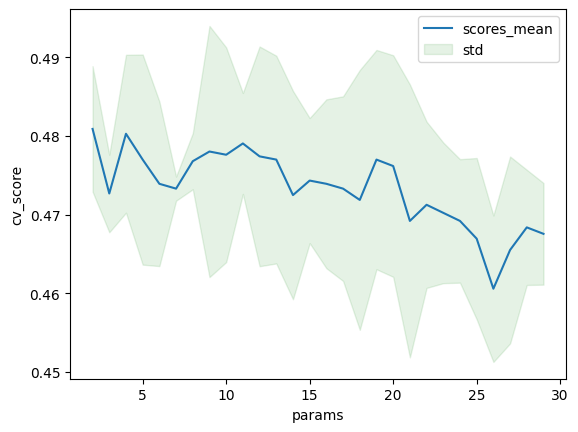

Best params: {'n_neighbors': 2}
              precision    recall  f1-score   support

           3       0.64      1.00      0.78        18
           4       0.60      0.98      0.75       164
           5       0.74      0.96      0.84      1625
           6       0.85      0.77      0.81      2127
           7       0.93      0.56      0.69       787
           8       1.00      0.40      0.58       151

    accuracy                           0.80      4872
   macro avg       0.79      0.78      0.74      4872
weighted avg       0.82      0.80      0.79      4872
               precision    recall  f1-score   support

           3       0.00      0.00      0.00        12
           4       0.15      0.27      0.19        52
           5       0.48      0.68      0.56       513
           6       0.56      0.49      0.52       709
           7       0.51      0.29      0.37       292
           8       0.22      0.09      0.12        47

    accuracy                           0.49  

In [99]:
model = KNeighborsClassifier()
hyperparams = list(range(2, 30))
param_grid = {'n_neighbors': hyperparams}

model_train(model, param_grid, hyperparams)

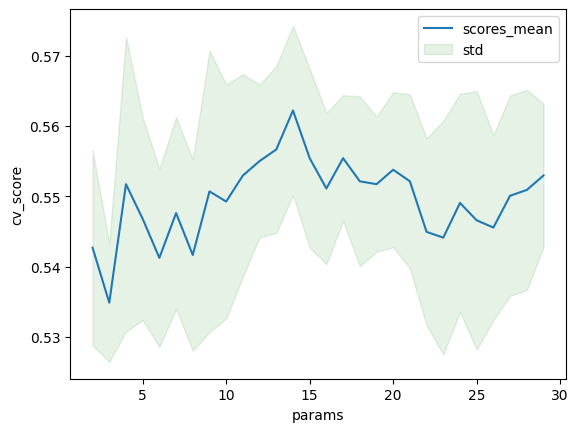

Best params: {'kneighborsclassifier__n_neighbors': 14}
              precision    recall  f1-score   support

           3       0.00      0.00      0.00        18
           4       0.68      0.08      0.14       164
           5       0.65      0.71      0.68      1625
           6       0.61      0.72      0.66      2127
           7       0.57      0.41      0.48       787
           8       0.27      0.03      0.05       151

    accuracy                           0.62      4872
   macro avg       0.46      0.32      0.34      4872
weighted avg       0.61      0.62      0.60      4872
               precision    recall  f1-score   support

           3       0.00      0.00      0.00        12
           4       0.50      0.02      0.04        52
           5       0.56      0.63      0.59       513
           6       0.53      0.62      0.57       709
           7       0.51      0.36      0.43       292
           8       0.25      0.02      0.04        47

    accuracy          

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [106]:
from sklearn.pipeline import make_pipeline

scale = StandardScaler()
knn = KNeighborsClassifier()
model = make_pipeline(scale, knn)

hyperparams = list(range(2, 30))
param_grid = {'kneighborsclassifier__n_neighbors': hyperparams}

model_train(model, param_grid, hyperparams)

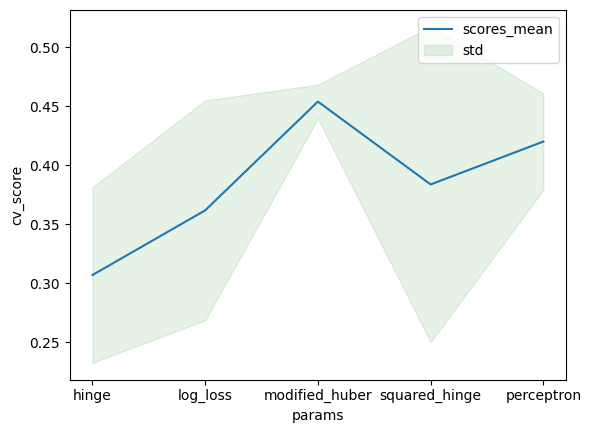

Best params: {'loss': 'modified_huber'}
              precision    recall  f1-score   support

           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00       164
           5       0.74      0.02      0.03      1625
           6       0.44      1.00      0.61      2127
           7       0.43      0.00      0.01       787
           8       0.00      0.00      0.00       151

    accuracy                           0.44      4872
   macro avg       0.27      0.17      0.11      4872
weighted avg       0.51      0.44      0.28      4872
               precision    recall  f1-score   support

           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00        52
           5       0.47      0.02      0.03       513
           6       0.44      0.99      0.61       709
           7       1.00      0.00      0.01       292
           8       0.00      0.00      0.00        47

    accuracy                         

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [107]:
model = SGDClassifier()
hyperparams = ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron']
param_grid = {'loss': hyperparams}

model_train(model, param_grid, hyperparams)

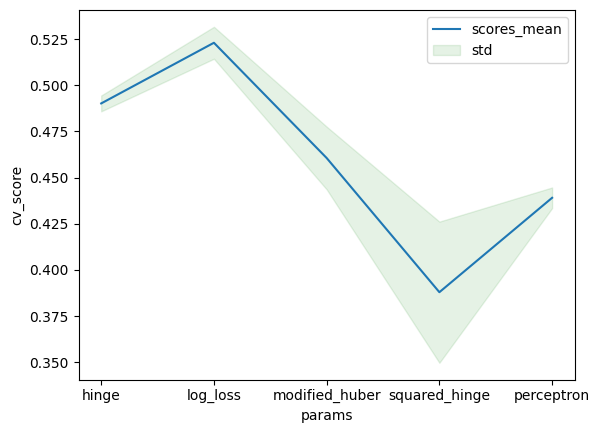

Best params: {'sgdclassifier__loss': 'log_loss'}
              precision    recall  f1-score   support

           3       0.00      0.00      0.00        18
           4       0.83      0.03      0.06       164
           5       0.57      0.63      0.60      1625
           6       0.51      0.70      0.59      2127
           7       0.44      0.10      0.16       787
           8       1.00      0.01      0.01       151

    accuracy                           0.53      4872
   macro avg       0.56      0.24      0.24      4872
weighted avg       0.54      0.53      0.49      4872
               precision    recall  f1-score   support

           3       0.00      0.00      0.00        12
           4       0.50      0.02      0.04        52
           5       0.53      0.60      0.56       513
           6       0.48      0.66      0.55       709
           7       0.36      0.09      0.14       292
           8       0.00      0.00      0.00        47

    accuracy                

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [108]:
scale = StandardScaler()
sgd = SGDClassifier()
model = make_pipeline(scale, sgd)

hyperparams = ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron']
param_grid = {'sgdclassifier__loss': hyperparams}

model_train(model, param_grid, hyperparams)

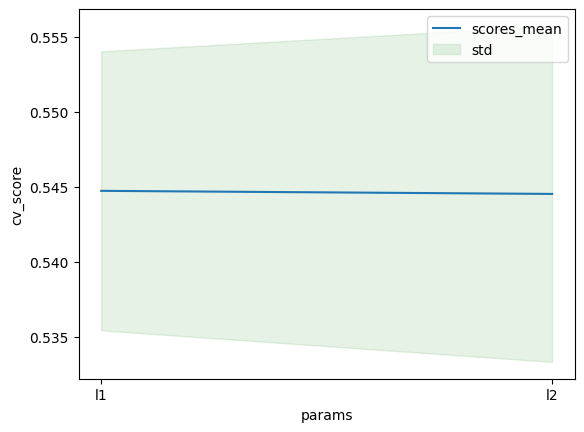

Best params: {'penalty': 'l1'}
              precision    recall  f1-score   support

           3       0.00      0.00      0.00        18
           4       1.00      0.01      0.01       164
           5       0.60      0.62      0.61      1625
           6       0.52      0.76      0.62      2127
           7       0.54      0.06      0.10       787
           8       0.00      0.00      0.00       151

    accuracy                           0.55      4872
   macro avg       0.44      0.24      0.22      4872
weighted avg       0.55      0.55      0.49      4872
               precision    recall  f1-score   support

           3       0.00      0.00      0.00        12
           4       1.00      0.02      0.04        52
           5       0.54      0.59      0.57       513
           6       0.49      0.72      0.58       709
           7       0.57      0.05      0.10       292
           8       0.00      0.00      0.00        47

    accuracy                           0.51   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [109]:
model = LogisticRegression(solver='liblinear')
hyperparams = ['l1', 'l2']
param_grid = {'penalty': hyperparams}

model_train(model, param_grid, hyperparams)

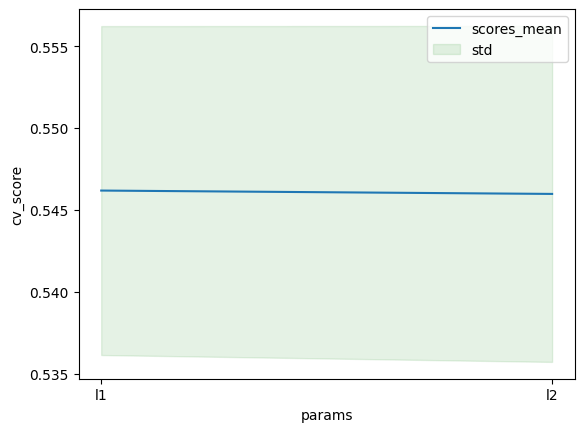

Best params: {'logisticregression__penalty': 'l1'}
              precision    recall  f1-score   support

           3       0.00      0.00      0.00        18
           4       1.00      0.01      0.02       164
           5       0.60      0.62      0.61      1625
           6       0.52      0.75      0.62      2127
           7       0.51      0.10      0.16       787
           8       0.00      0.00      0.00       151

    accuracy                           0.55      4872
   macro avg       0.44      0.25      0.24      4872
weighted avg       0.55      0.55      0.50      4872
               precision    recall  f1-score   support

           3       0.00      0.00      0.00        12
           4       1.00      0.02      0.04        52
           5       0.55      0.59      0.57       513
           6       0.50      0.71      0.58       709
           7       0.59      0.12      0.19       292
           8       0.00      0.00      0.00        47

    accuracy              

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [110]:
scale = StandardScaler()
lr = LogisticRegression(solver='liblinear')
model = make_pipeline(scale, lr)

hyperparams = ['l1', 'l2']
param_grid = {'logisticregression__penalty': hyperparams}

model_train(model, param_grid, hyperparams)

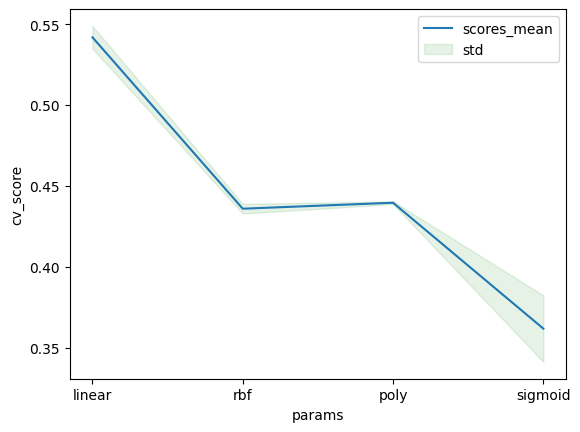

Best params: {'kernel': 'linear'}
              precision    recall  f1-score   support

           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00       164
           5       0.60      0.62      0.61      1625
           6       0.51      0.77      0.61      2127
           7       0.00      0.00      0.00       787
           8       0.00      0.00      0.00       151

    accuracy                           0.54      4872
   macro avg       0.19      0.23      0.20      4872
weighted avg       0.42      0.54      0.47      4872
               precision    recall  f1-score   support

           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00        52
           5       0.55      0.59      0.57       513
           6       0.48      0.73      0.58       709
           7       0.00      0.00      0.00       292
           8       0.00      0.00      0.00        47

    accuracy                           0.51

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [102]:
model = SVC()

hyperparams = ['linear', 'rbf', 'poly', 'sigmoid']
param_grid = {'kernel': hyperparams}

model_train(model, param_grid, hyperparams)

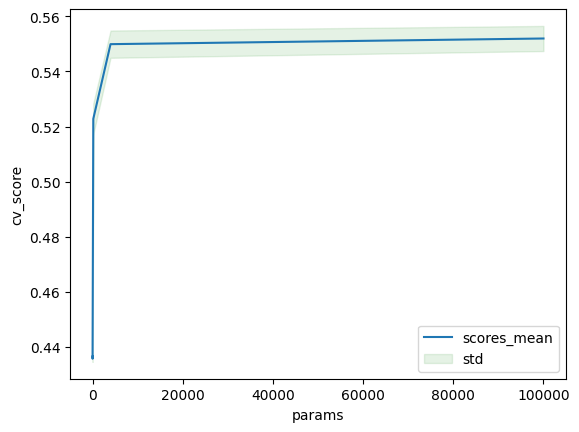

Best params: {'C': 100000.0}
              precision    recall  f1-score   support

           3       1.00      0.06      0.11        18
           4       0.00      0.00      0.00       164
           5       0.62      0.66      0.64      1625
           6       0.54      0.77      0.63      2127
           7       0.56      0.08      0.14       787
           8       0.00      0.00      0.00       151

    accuracy                           0.57      4872
   macro avg       0.45      0.26      0.25      4872
weighted avg       0.54      0.57      0.51      4872
               precision    recall  f1-score   support

           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00        52
           5       0.56      0.62      0.59       513
           6       0.50      0.71      0.58       709
           7       0.65      0.08      0.15       292
           8       0.00      0.00      0.00        47

    accuracy                           0.52     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [105]:
model = SVC()

hyperparams = np.logspace(-2, 5, 6)
param_grid = {'C': hyperparams}

model_train(model, param_grid, hyperparams)

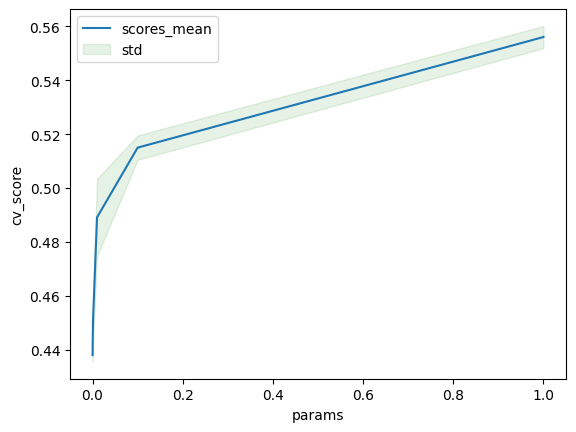

Best params: {'gamma': 1}
              precision    recall  f1-score   support

           3       1.00      0.67      0.80        18
           4       1.00      0.51      0.68       164
           5       0.94      0.94      0.94      1625
           6       0.88      0.98      0.93      2127
           7       0.98      0.81      0.89       787
           8       0.99      0.76      0.86       151

    accuracy                           0.92      4872
   macro avg       0.96      0.78      0.85      4872
weighted avg       0.92      0.92      0.91      4872
               precision    recall  f1-score   support

           3       0.00      0.00      0.00        12
           4       1.00      0.04      0.07        52
           5       0.66      0.51      0.58       513
           6       0.54      0.82      0.65       709
           7       0.73      0.33      0.45       292
           8       0.67      0.21      0.32        47

    accuracy                           0.59      16

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [101]:
model = SVC()

hyperparams = [1, 0.1, 0.01, 0.001, 0.0001]
param_grid = {'gamma': hyperparams}

model_train(model, param_grid, hyperparams)